<a href="https://colab.research.google.com/github/IsaacIsaias/seafood-classifiers/blob/main/Seafood_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning GitHub Repository in Colab

In [ ]:
!git clone https://github.com/IsaacIsaias/seafood-classifiers.git

Cloning into 'seafood-classifiers'...
remote: Enumerating objects: 18501, done.
remote: Total 18501 (delta 0), reused 0 (delta 0), pack-reused 18501
Receiving objects: 100% (18501/18501), 3.23 GiB | 37.24 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Checking out files: 100% (18432/18432), done.


# Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from pathlib import Path
import os.path
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import Input, Model
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.callbacks import EarlyStopping

# Data Manipulation

## Getting Data

In [ ]:
os.listdir('/content/seafood-classifiers/Fish_Dataset/')

['Sea Bass',
 'Black Sea Sprat',
 'Hourse Mackerel',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Red Sea Bream',
 'Gilt-Head Bream']

In [ ]:
# Getting filepaths
filepaths = []
for filepath in glob.iglob('/content/seafood-classifiers/Fish_Dataset/**/*.png', recursive=True):
  filepaths.append(filepath)

# Getting labels
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths

['/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00232.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00688.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00464.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00963.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00603.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00984.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00182.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/01000.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00071.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00505.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00112.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00725.png',
 '/content/seafood-classifiers/Fish_Dataset/Sea Bass/Sea Bass/00978.png',
 '/content/seafood-classifiers/Fish_Da

In [ ]:
labels

['Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',
 'Sea Bass',

In [ ]:
os.path.split('/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png')

('/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat/Black Sea Sprat',
 '00001.png')

In [ ]:
os.path.split('/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png')[0]

'/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat/Black Sea Sprat'

In [ ]:
os.path.split(os.path.split('/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png')[0])

('/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat',
 'Black Sea Sprat')

In [ ]:
os.path.split(os.path.split('/content/seafood-classifiers/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png')[0])[1]

'Black Sea Sprat'

## Series Generation

In [ ]:
# Filepaths/Labels Series generation
filepaths = pd.Series(filepaths, name='Filepath')
labels = pd.Series(labels, name='Label')

In [ ]:
filepaths

0        /content/seafood-classifiers/Fish_Dataset/Sea ...
1        /content/seafood-classifiers/Fish_Dataset/Sea ...
2        /content/seafood-classifiers/Fish_Dataset/Sea ...
3        /content/seafood-classifiers/Fish_Dataset/Sea ...
4        /content/seafood-classifiers/Fish_Dataset/Sea ...
                               ...                        
17995    /content/seafood-classifiers/Fish_Dataset/Gilt...
17996    /content/seafood-classifiers/Fish_Dataset/Gilt...
17997    /content/seafood-classifiers/Fish_Dataset/Gilt...
17998    /content/seafood-classifiers/Fish_Dataset/Gilt...
17999    /content/seafood-classifiers/Fish_Dataset/Gilt...
Name: Filepath, Length: 18000, dtype: object

In [ ]:
labels

0               Sea Bass
1               Sea Bass
2               Sea Bass
3               Sea Bass
4               Sea Bass
              ...       
17995    Gilt-Head Bream
17996    Gilt-Head Bream
17997    Gilt-Head Bream
17998    Gilt-Head Bream
17999    Gilt-Head Bream
Name: Label, Length: 18000, dtype: object

## Dataframe Generation

In [ ]:
# Filepaths/Labels Series concatenation
seafood_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
seafood_df

,Filepath,Label
0,/content/seafood-classifiers/Fish_Dataset/Sea ...,Sea Bass
1,/content/seafood-classifiers/Fish_Dataset/Sea ...,Sea Bass
2,/content/seafood-classifiers/Fish_Dataset/Sea ...,Sea Bass
3,/content/seafood-classifiers/Fish_Dataset/Sea ...,Sea Bass
4,/content/seafood-classifiers/Fish_Dataset/Sea ...,Sea Bass
...,...,...
17995,/content/seafood-classifiers/Fish_Dataset/Gilt...,Gilt-Head Bream
17996,/content/seafood-classifiers/Fish_Dataset/Gilt...,Gilt-Head Bream
17997,/content/seafood-classifiers/Fish_Dataset/Gilt...,Gilt-Head Bream
17998,/content/seafood-classifiers/Fish_Dataset/Gilt...,Gilt-Head Bream


In [ ]:
# Drop Ground Truth images
seafood_df['Label'] = seafood_df['Label'].apply(lambda x: np.NaN if x[-2:] == 'GT' else x)
seafood_df = seafood_df.dropna(axis=0).sample(frac=1.0, random_state=27).reset_index(drop=True)

In [ ]:
seafood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  9000 non-null   object
 1   Label     9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
seafood_df['Label'].value_counts()

Shrimp                1000
Trout                 1000
Sea Bass              1000
Striped Red Mullet    1000
Black Sea Sprat       1000
Red Sea Bream         1000
Red Mullet            1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Name: Label, dtype: int64

In [ ]:
seafood_df['Label'].unique()

array(['Trout', 'Shrimp', 'Striped Red Mullet', 'Red Sea Bream',
       'Gilt-Head Bream', 'Sea Bass', 'Black Sea Sprat', 'Red Mullet',
       'Hourse Mackerel'], dtype=object)

## Showing Data

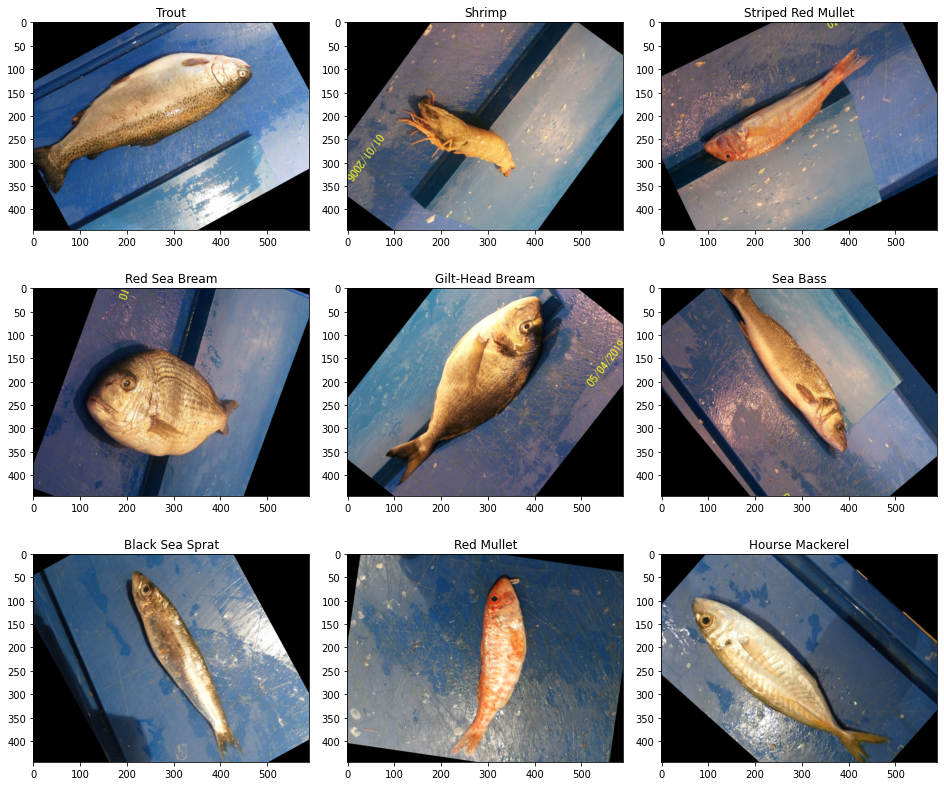

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13,11), constrained_layout=True)
ax = ax.flatten()
j = 0

for i in seafood_df['Label'].unique():
  ax[j].imshow(plt.imread(seafood_df[seafood_df['Label'] == i].iloc[0,0]))
  ax[j].set_title(i)
  j = j + 1

## Counting Data

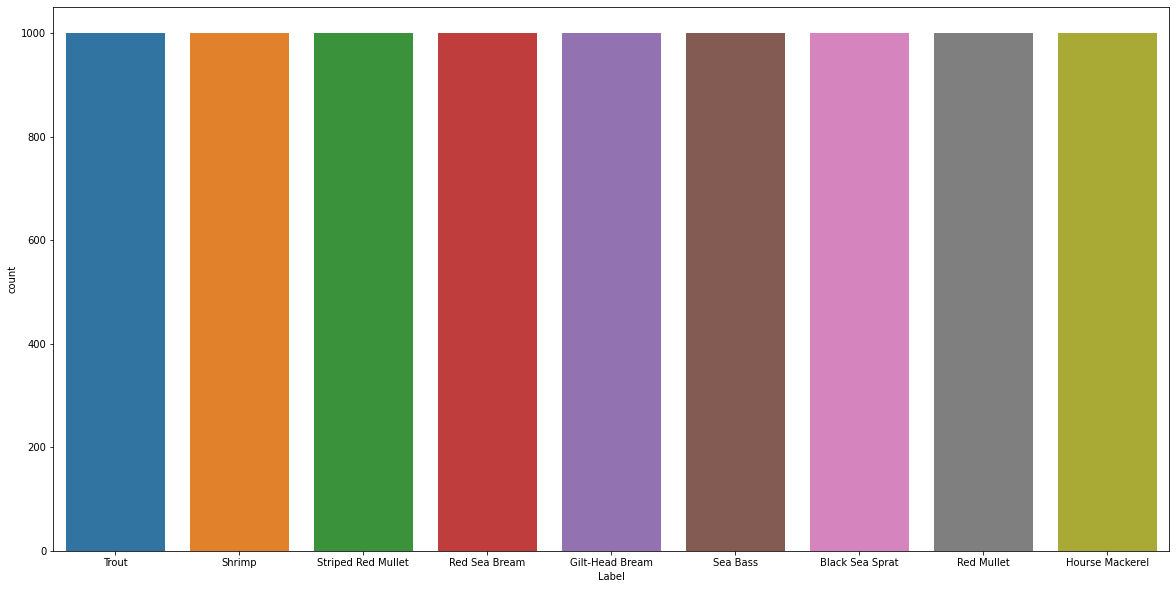

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = seafood_df['Label'])

# FutureWarning: Pass the following variable as a keyword arg: x.
# From version 0.12, the only valid positional argument will be `data`,
# and passing other arguments without an explicit keyword will result in
# an error or misinterpretation.

# Model's Implementation

## Loading Data

### Data Shape

In [ ]:
plt.imread(seafood_df['Filepath'][0]).shape

(445, 590, 3)

### Splitting Data

In [ ]:
RS = 37
df_train, df_test = train_test_split(seafood_df, train_size=0.7, shuffle=True, random_state=RS)
df_test, df_val = train_test_split(df_test, test_size=0.5, shuffle=True, random_state=RS)

In [ ]:
print("  Training Data Shape: ", df_train.shape)
print("      Test Data Shape: ", df_test.shape)
print("Validation Data Shape: ", df_val.shape)

  Training Data Shape:  (6300, 2)
      Test Data Shape:  (1350, 2)
Validation Data Shape:  (1350, 2)


### Counting Data

In [ ]:
df_train['Label'].value_counts()

Shrimp                715
Trout                 708
Hourse Mackerel       705
Sea Bass              701
Gilt-Head Bream       701
Black Sea Sprat       695
Striped Red Mullet    694
Red Mullet            694
Red Sea Bream         687
Name: Label, dtype: int64

In [ ]:
df_test['Label'].value_counts()

Red Mullet            162
Hourse Mackerel       156
Striped Red Mullet    156
Sea Bass              155
Black Sea Sprat       154
Gilt-Head Bream       148
Shrimp                147
Red Sea Bream         139
Trout                 133
Name: Label, dtype: int64

In [ ]:
df_val['Label'].value_counts()

Red Sea Bream         174
Trout                 159
Gilt-Head Bream       151
Black Sea Sprat       151
Striped Red Mullet    150
Sea Bass              144
Red Mullet            144
Hourse Mackerel       139
Shrimp                138
Name: Label, dtype: int64

## Generating Data

In [ ]:
train_generator = ImageDataGenerator(rescale = 1.0 / 255)

test_generator = ImageDataGenerator(rescale = 1.0 / 255)

val_generator = ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
TARGET_SIZE=(256,256)
BATCH_SIZE=30
SEED=17

train_set = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,  
)

test_set = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
)

val_set = val_generator.flow_from_dataframe(
    dataframe=df_val,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,  
)

Found 6300 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.


# Model's Developement

## CNN Architecture

In [ ]:
input_layer = Input(shape=(256, 256, 3))

x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(input_layer)
x = MaxPooling2D()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

output_layer = Dense(9, activation='softmax')(x)

model = Model(input_layer, output_layer)

## Model's Summary

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 128)              0     

## Compiling the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Training the Model

In [ ]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
210/210 [==============================] - 137s 500ms/step - loss: 1.9523 - accuracy: 0.2456 - val_loss: 1.6440 - val_accuracy: 0.3667
Epoch 2/100
210/210 [==============================] - 91s 433ms/step - loss: 1.5210 - accuracy: 0.4310 - val_loss: 1.3472 - val_accuracy: 0.4933
Epoch 3/100
210/210 [==============================] - 89s 425ms/step - loss: 1.2419 - accuracy: 0.5337 - val_loss: 1.1988 - val_accuracy: 0.5711
Epoch 4/100
210/210 [==============================] - 91s 432ms/step - loss: 0.9794 - accuracy: 0.6410 - val_loss: 0.8452 - val_accuracy: 0.6830
Epoch 5/100
210/210 [==============================] - 90s 428ms/step - loss: 0.7559 - accuracy: 0.7165 - val_loss: 0.6535 - val_accuracy: 0.7637
Epoch 6/100
210/210 [==============================] - 89s 422ms/step - loss: 0.6128 - accuracy: 0.7702 - val_loss: 0.6968 - val_accuracy: 0.7089
Epoch 7/100
210/210 [==============================] - 88s 420ms/step - loss: 0.5323 - accuracy: 0.7898 - val_loss: 0.5133 

# Results

## Evaluating the Model

In [ ]:
results = model.evaluate(test_set, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.11411
Test Accuracy: 95.33%


## Loss & Precission Graphs

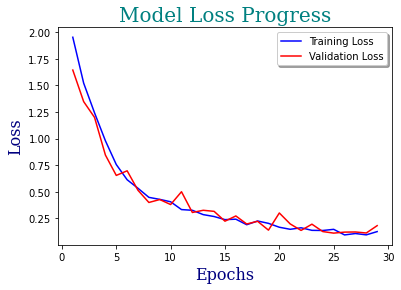

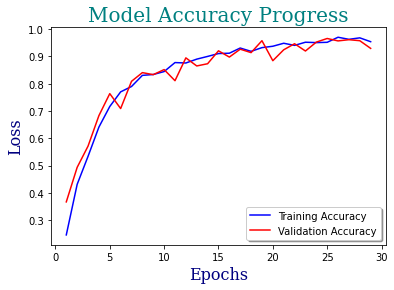

In [ ]:
# Plotting loss and precision curves for training and validation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Model Loss Progress', fontdict={'family':'serif', 'color':'teal', 'size':20})
plt.xlabel('Epochs', fontdict={'family':'serif', 'color':'navy', 'size':16})
plt.ylabel('Loss', fontdict={'family':'serif', 'color':'navy', 'size':16})
plt.legend(loc='best', shadow=True)
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Model Accuracy Progress', fontdict={'family':'serif', 'color':'teal', 'size':20})
plt.xlabel('Epochs', fontdict={'family':'serif', 'color':'navy', 'size':16})
plt.ylabel('Loss', fontdict={'family':'serif', 'color':'navy', 'size':16})
plt.legend(loc='best', shadow=True)
plt.show()

## Classification Report and Confusion Matrix

Classification Report:
----------------------
                     precision    recall  f1-score   support

   Black Sea Sprat       0.99      1.00      1.00       154
   Gilt-Head Bream       0.87      0.89      0.88       148
   Hourse Mackerel       0.99      0.97      0.98       156
        Red Mullet       1.00      0.99      1.00       162
     Red Sea Bream       0.88      0.96      0.92       139
          Sea Bass       0.90      0.94      0.91       155
            Shrimp       1.00      1.00      1.00       147
Striped Red Mullet       0.99      0.99      0.99       156
             Trout       0.96      0.81      0.88       133

          accuracy                           0.95      1350
         macro avg       0.95      0.95      0.95      1350
      weighted avg       0.95      0.95      0.95      1350



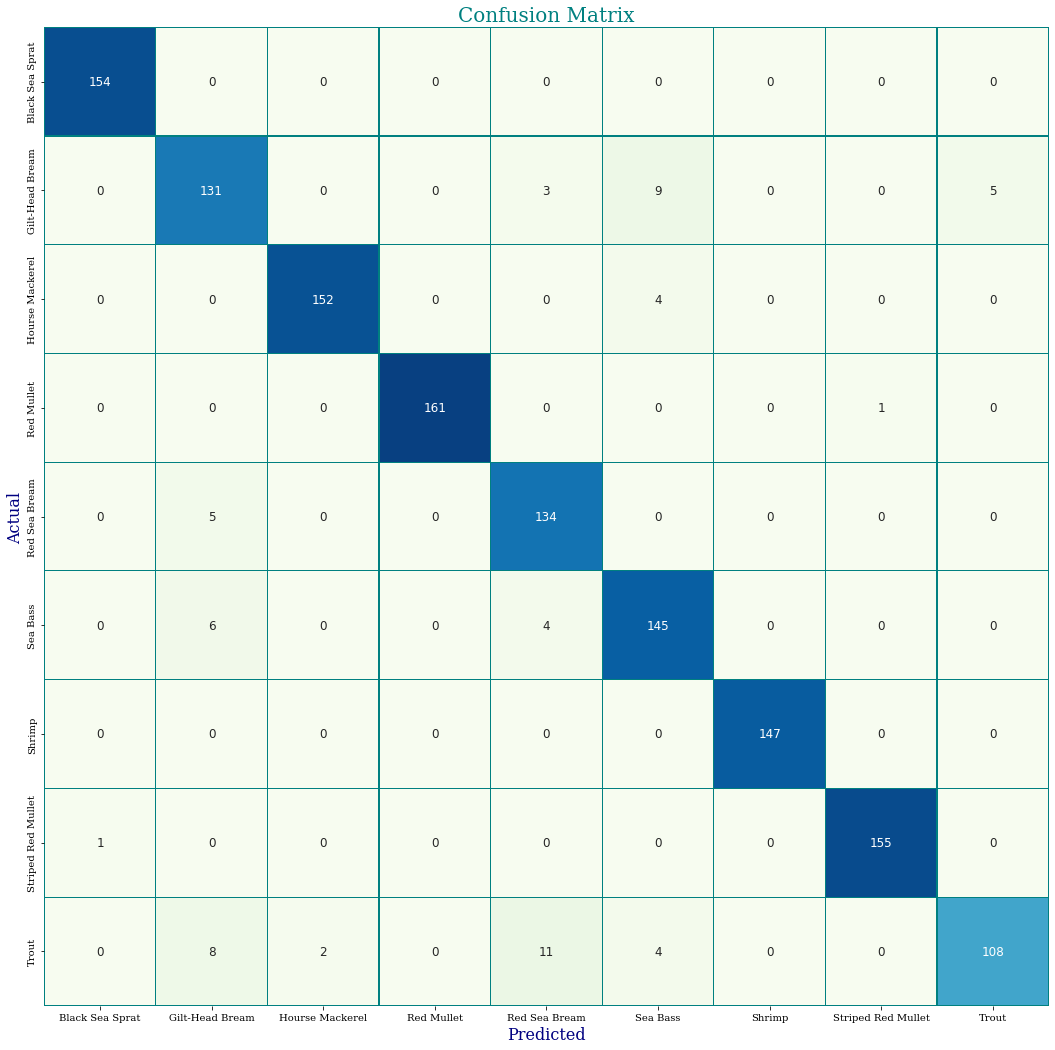

In [ ]:
predictions = np.argmax(model.predict(test_set), axis=1)

cm = confusion_matrix(test_set.labels, predictions)
clr = classification_report(test_set.labels, predictions, target_names=list(train_set.class_indices.keys()))

plt.figure(figsize=(18, 18))
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt='g', vmin=0, cmap='GnBu', cbar=False, linewidths=0.1, linecolor='teal')

plt.title("Confusion Matrix", fontdict={'family':'serif', 'color':'teal', 'size':20})
plt.xticks(ticks=np.arange(9) + 0.5, labels=list(train_set.class_indices.keys()), family='serif', size=10)
plt.yticks(ticks=np.arange(9) + 0.5, labels=list(train_set.class_indices.keys()), family='serif', size=10, verticalalignment="center")
plt.xlabel("Predicted", fontdict={'family':'serif', 'color':'navy', 'size':16})
plt.ylabel("Actual", fontdict={'family':'serif', 'color':'navy', 'size':16})
plt.show

print("Classification Report:\n----------------------\n", clr)

# Saving the Model

In [ ]:
model.save('model1.h5')